In [24]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.linalg import toeplitz
import scipy
from statsmodels.stats.diagnostic import het_white


In [2]:
df = pd.read_csv('Large_Small_Day_of_Week.csv').dropna()

In [3]:
df

,Date,Days,STIR,LSR,SSR,d1,d2,d3,d4,d5
1,28/10/1997,Tuesday,-0.096719,-0.088550,-0.091323,0,1,0,0,0
2,29/10/1997,Wednesday,0.066769,0.053139,0.030660,0,0,1,0,0
3,30/10/1997,Thursday,0.000000,0.000000,0.000000,0,0,0,1,0
4,31/10/1997,Friday,0.020108,0.002225,0.015986,0,0,0,0,1
5,3/11/1997,Monday,0.069216,0.057976,0.093426,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1295,14/10/2002,Monday,0.003452,0.002468,-0.007561,1,0,0,0,0
1296,15/10/2002,Tuesday,0.036498,0.033885,0.046484,0,1,0,0,0
1297,16/10/2002,Wednesday,0.006533,0.007196,0.042938,0,0,1,0,0
1298,17/10/2002,Thursday,0.018568,0.019657,0.023428,0,0,0,1,0


# 1

In [4]:
df= df[1:]
df.shape

(1298, 10)

In [5]:
# Filter data for Mondays
monday_data = df[df['Days'] == 'Monday']

# Calculate mean returns for LSR and SSR on Mondays
mean_lsr = monday_data['LSR'].mean()
mean_ssr = monday_data['SSR'].mean()

# Calculate the difference in means
mean_difference = mean_lsr - mean_ssr

In [6]:
# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(monday_data['LSR'].dropna(), 
                                  monday_data['SSR'].dropna(), 
                                  equal_var=True)

In [7]:
(mean_difference, t_stat, p_value)

(0.006249024521235522, 2.436323025532494, 0.015174628227012599)

# Question 2: OLS regression


In [8]:
formula = 'LSR ~ STIR + d1 + d2 + d3 + d4 + d5 - 1' #The - 1 at the end of the formula indicates that the model should not include an intercept term, which is typically included by default
results = ols(formula, df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    LSR   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1973.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:27:32   Log-Likelihood:                 4862.6
No. Observations:                1298   AIC:                            -9713.
Df Residuals:                    1292   BIC:                            -9682.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
STIR           0.9224      0.009     99.208      0.0

In [9]:
results.resid.shape

(1298,)

In [10]:
formula = 'SSR ~ STIR + d1 + d2 + d3 + d4 + d5 - 1'
result2 = ols(formula, df).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SSR   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     97.92
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           1.27e-87
Time:                        17:27:32   Log-Likelihood:                 3000.6
No. Observations:                1298   AIC:                            -5989.
Df Residuals:                    1292   BIC:                            -5958.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
STIR           0.8416      0.039     21.565      0.000       0.765       0.918
d1            -0.0061      0.001     -4.092      0.000      -0.009      -0.003
d2            -0.0007      0.001     -0.495      0.620      -0.004       0.002
d3             0.0011      0.001      0.733      0.464      -0.002       0.004
d4            -0.0004      0.001     -0.247      0.805      -0.003       0.003
d5             0.0005      0.001      0.357      0.721      -0.002       0.003
==============================================================================
Omnibus:                      148.228   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.810
Skew:                           0.050   Prob(JB):                    1.53e-282
Kurtosis:                       7.898   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3

In [11]:
var_LSR = results.resid.var()
var_SSR = result2.resid.var()

- add lsr and ssr, this is like holding a portfolio of 50-50 large and small

In [12]:
var_LSR

3.265210180492928e-05

In [13]:
var_SSR

0.0005753341547356779

In [14]:
np.repeat(var_LSR, 1299).shape

(1299,)

In [15]:
np.concatenate((np.repeat(var_LSR, 1299), np.repeat(var_SSR, 1299)))

array([3.26521018e-05, 3.26521018e-05, 3.26521018e-05, ...,
       5.75334155e-04, 5.75334155e-04, 5.75334155e-04])

Example
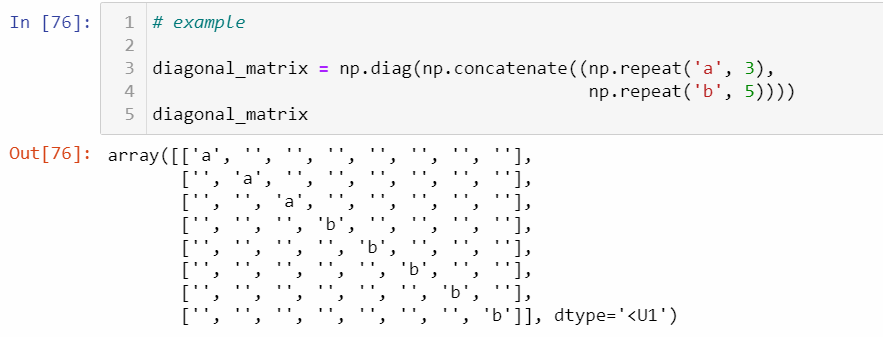

In [16]:
diagonal_matrix = np.diag(np.concatenate((np.repeat(var_LSR, len(df)), np.repeat(var_SSR, len(df)))))
diagonal_matrix

array([[3.26521018e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.26521018e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.26521018e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.75334155e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.75334155e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.75334155e-04]])

In [17]:
data1 = df.drop(columns="SSR")
data1 = data1.rename(columns = {"LSR" : "variable"})
data1

,Date,Days,STIR,variable,d1,d2,d3,d4,d5
2,29/10/1997,Wednesday,0.066769,0.053139,0,0,1,0,0
3,30/10/1997,Thursday,0.000000,0.000000,0,0,0,1,0
4,31/10/1997,Friday,0.020108,0.002225,0,0,0,0,1
5,3/11/1997,Monday,0.069216,0.057976,1,0,0,0,0
6,4/11/1997,Tuesday,-0.001592,0.003858,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1295,14/10/2002,Monday,0.003452,0.002468,1,0,0,0,0
1296,15/10/2002,Tuesday,0.036498,0.033885,0,1,0,0,0
1297,16/10/2002,Wednesday,0.006533,0.007196,0,0,1,0,0
1298,17/10/2002,Thursday,0.018568,0.019657,0,0,0,1,0


In [18]:
data2 = df.drop(columns="LSR")
data2 = data2.rename(columns = {"SSR" : "variable"})
data2

,Date,Days,STIR,variable,d1,d2,d3,d4,d5
2,29/10/1997,Wednesday,0.066769,0.030660,0,0,1,0,0
3,30/10/1997,Thursday,0.000000,0.000000,0,0,0,1,0
4,31/10/1997,Friday,0.020108,0.015986,0,0,0,0,1
5,3/11/1997,Monday,0.069216,0.093426,1,0,0,0,0
6,4/11/1997,Tuesday,-0.001592,-0.009744,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1295,14/10/2002,Monday,0.003452,-0.007561,1,0,0,0,0
1296,15/10/2002,Tuesday,0.036498,0.046484,0,1,0,0,0
1297,16/10/2002,Wednesday,0.006533,0.042938,0,0,1,0,0
1298,17/10/2002,Thursday,0.018568,0.023428,0,0,0,1,0


In [19]:
data3 = pd.concat([data1, data2], axis = 0)
data3

,Date,Days,STIR,variable,d1,d2,d3,d4,d5
2,29/10/1997,Wednesday,0.066769,0.053139,0,0,1,0,0
3,30/10/1997,Thursday,0.000000,0.000000,0,0,0,1,0
4,31/10/1997,Friday,0.020108,0.002225,0,0,0,0,1
5,3/11/1997,Monday,0.069216,0.057976,1,0,0,0,0
6,4/11/1997,Tuesday,-0.001592,0.003858,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1295,14/10/2002,Monday,0.003452,-0.007561,1,0,0,0,0
1296,15/10/2002,Tuesday,0.036498,0.046484,0,1,0,0,0
1297,16/10/2002,Wednesday,0.006533,0.042938,0,0,1,0,0
1298,17/10/2002,Thursday,0.018568,0.023428,0,0,0,1,0


In [20]:
diagonal_matrix.shape

(2596, 2596)

In [21]:
gls_model = sm.GLS(data3['variable'], data3[["STIR","d1","d2","d3","d4","d5"]], sigma=diagonal_matrix)
gls_results = gls_model.fit()
print(gls_results.summary())

                            GLS Regression Results                            
Dep. Variable:               variable   R-squared:                       0.799
Model:                            GLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     2054.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:27:33   Log-Likelihood:                 7852.1
No. Observations:                2596   AIC:                        -1.569e+04
Df Residuals:                    2590   BIC:                        -1.566e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
STIR           0.9180      0.009    101.189      0.0

# 4
- why **2?
- Typically, the Breusch-Pagan test is used to detect the presence of heteroskedasticity by regressing the squared residuals from the original regression on the same independent variables. 

In [28]:
dx_w_dummy = sm.add_constant(
    data3[["STIR","d1","d2","d3","d4","d5"]])
    
bp_test = het_breuschpagan(gls_results.resid**2,dx_w_dummy)
print ('LM-test chi-sq:', bp_test[0], 'LM-test p_value:', bp_test[1])

LM-test chi-sq: 7.742113469106433 LM-test p_value: 0.2576120991455742


In [32]:
wh_test = het_white(gls_results.resid**2,dx_w_dummy)
print ('LM-test chi-sq:', wh_test[0], 'LM-test p_value:', wh_test[1])

LM-test chi-sq: 12.561862285956567 LM-test p_value: 0.24921011001688073


# 5

In [33]:
df

,Date,Days,STIR,LSR,SSR,d1,d2,d3,d4,d5
2,29/10/1997,Wednesday,0.066769,0.053139,0.030660,0,0,1,0,0
3,30/10/1997,Thursday,0.000000,0.000000,0.000000,0,0,0,1,0
4,31/10/1997,Friday,0.020108,0.002225,0.015986,0,0,0,0,1
5,3/11/1997,Monday,0.069216,0.057976,0.093426,1,0,0,0,0
6,4/11/1997,Tuesday,-0.001592,0.003858,-0.009744,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1295,14/10/2002,Monday,0.003452,0.002468,-0.007561,1,0,0,0,0
1296,15/10/2002,Tuesday,0.036498,0.033885,0.046484,0,1,0,0,0
1297,16/10/2002,Wednesday,0.006533,0.007196,0.042938,0,0,1,0,0
1298,17/10/2002,Thursday,0.018568,0.019657,0.023428,0,0,0,1,0


In [35]:
Dx=pd.concat([df['STIR'],df['d1'],df['d2'],df['d3'],df['d4'],df['d5']],axis=1)


In [38]:
resid_fit = sm.OLS(
    np.asarray(results.resid)[1:], 
    sm.add_constant(np.asarray(results.resid)[:-1])
).fit()

rho = resid_fit.params[1] #  value between -1 and 1 representing the correlation between errors at different observations
trix = toeplitz(range(len(results.resid))) ### trix is sq matrix with zero in diag, 1 in first off diag, 2 in 2nd off diag, etc.
# Toeplitz matrix, which is a matrix where each descending diagonal from left to right is constant.
sigma = rho ** trix ### create a covariance matrix for the residuals, assuming a particular structure of autocorrelation that depends on a parameter rho
gls_model = sm.GLS(df['LSR'], Dx, sigma=sigma) # a GLS model is being set up using the dependent variable contcpdret, the matrix of independent variables Dx, and the covariance matrix sigma
gls_results = gls_model.fit()

gls_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                    LSR   R-squared:                       0.883
Model:                            GLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1956.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:50:29   Log-Likelihood:                 4864.1
No. Observations:                1298   AIC:                            -9716.
Df Residuals:                    1292   BIC:                            -9685.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
STIR           0.9223      0.009     98.788      0.000       0.904       0.941
d1             0.0003      0.000      0.749      0.454      -0.000       0.001
d2             0.0008      0.000      2.137      0.033    6.24e-05       0.001
d3          7.041e-05      0.000      0.198      0.843      -0.001       0.001
d4            -0.0001      0.000     -0.388      0.698      -0.001       0.001
d5            -0.0002      0.000     -0.468      0.640      -0.001       0.001
==============================================================================
Omnibus:                      100.614   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              452.988
Skew:                           0.195   Prob(JB):                     4.31e-99
Kurtosis:                       5.868   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""